In [1]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv(r'C:\Users\abdul\DataspellProjects\Data science\dataset\Covid19_Confirmed_dataset.csv')

In [2]:
dataset.shape

(266, 104)

In [3]:
dataset.drop(["Lat", "Long"], axis = 1, inplace= True)

In [4]:
#creating a new dataset
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [5]:
corona_dataset_aggregated.columns = pd.to_datetime(corona_dataset_aggregated.columns, errors='coerce').strftime('%b')

In [6]:
corona_dataset_aggregated.groupby(level=0 ,axis=1).sum().reset_index()

,Country/Region,Apr,Feb,Jan,Mar
0,Afghanistan,27237,6,0,1219
1,Albania,15632,0,0,2232
2,Algeria,69497,5,0,4823
3,Andorra,19106,0,0,2787
4,Angola,601,0,0,48
...,...,...,...,...,...
182,West Bank and Gaza,9840,0,0,1355
183,Western Sahara,142,0,0,0
184,Yemen,31,0,0,0
185,Zambia,1754,0,0,194


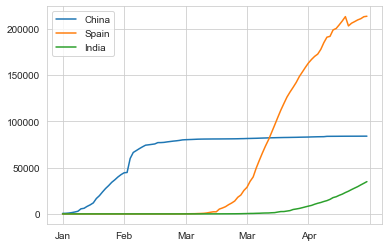

In [7]:
import matplotlib.pyplot as plt
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["India"].plot()
plt.legend()

<AxesSubplot:>

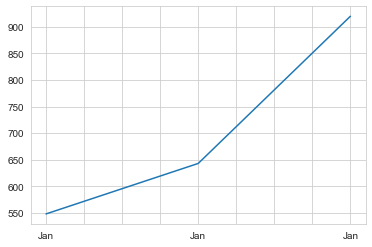

In [8]:
corona_dataset_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

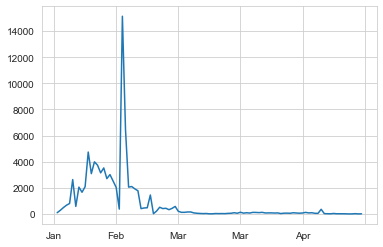

In [9]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [10]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [11]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates
corona_dataset_aggregated

,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,...,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [12]:
#Assign a new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [13]:
#import dataset 2
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report

FileNotFoundError: [Errno 2] No such file or directory: 'worldwide_happiness_report.csv'

In [ ]:
#drop the useless columns 
useless_cols = ["Overall rank","Score", "Generosity", "Perceptions of corruption"]

In [ ]:
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report

In [ ]:
happiness_report.set_index("Country or region", inplace=True)
happiness_report

In [ ]:
corona_data.shape

In [ ]:
happiness_report.shape

In [ ]:
data = corona_data.join(happiness_report, how="outer")
data

In [ ]:
data = corona_data.join(happiness_report, how="inner")
data

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
import seaborn as sns
import numpy as np
x=data["GDP per capita"]
y=data["Max_infection_rates"]
sns.scatterplot(x, y)

In [ ]:
x = data["GDP per capita"];y = data["Max_infection_rates"];plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);sns.scatterplot(x, np.log(y));plt.title('Scatterplot')
plt.subplot(1, 2, 2);sns.regplot(x, np.log(y));plt.title('Regression Plot')


In [ ]:
x = data["Social support"];y = data["Max_infection_rates"];plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);sns.scatterplot(x, np.log(y));plt.title('Scatterplot')
plt.subplot(1, 2, 2);sns.regplot(x, np.log(y));plt.title('Regression Plot')
#plt.tight_layout()

In [ ]:
x = data["Healthy life expectancy"];y = data["Max_infection_rates"];plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);sns.scatterplot(x, np.log(y));plt.title('Scatterplot')
plt.subplot(1, 2, 2);sns.regplot(x, np.log(y));plt.title('Regression Plot')
#plt.tight_layout()

In [ ]:
x = data["Freedom to make life choices"];y = data["Max_infection_rates"];plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);sns.scatterplot(x, np.log(y));plt.title('Scatterplot')
plt.subplot(1, 2, 2);sns.regplot(x, np.log(y));plt.title('Regression Plot')
#plt.tight_layout()